In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Arc
import seaborn as sns

**[CRQ2] 1. Considering only the match Barcelona - Real Madrid played on the 6 May 2018:
visualize with a heatmap the zones where Cristiano Ronaldo was more active. The events to be considered are: passes, shoots, duels, free kicks.
compare his map with the one of Lionel Messi. Comment the results and point out the main differences (we are not looking for deep and technique analysis, just show us if there are some clear differences between the 2 plots).**

In [2]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [8]:
matches_Spain = pd.read_json('/Users/MO/Desktop/AMD/AMD-HW2/Dataset/matches/matches_Spain.json')
events_Spain = pd.read_json('/Users/MO/Desktop/AMD/AMD-HW2/Dataset/events/events_Spain.json')

In [5]:
classico_events = events_Spain.where(events_Spain.matchId == 2565907).dropna() #Target match events
Ronaldo = classico_events.where(classico_events.playerId==3322).dropna() #All Ronaldo's Events
Messi = classico_events.where(classico_events.playerId==3359).dropna() #All Messi's events

In [90]:
def kde_plot(pos , color):
    #this function for kdeplot
    #INPUT: event positions and color
    x_coord = [i[0].get('x')*1.2 for i in pos] #scale x by 1.2 because the pitch x axis is 120 and x position up to 100
    y_coord = [i[0].get('y')*0.8 for i in pos] #scale x by 0.8 because the pitch y axis is 80 and x position up to 100
    sns.kdeplot(x_coord, y_coord, shade = "True", color = color, n_levels = 30)

def heatmap(pos):
    #This function is to plot the heatmap
    #INPUT: positions
    #OUTPUT: showing the plot
    fig=plt.figure() #set up the figure
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    kde_plot(pos , 'green')

    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(82, -2)
    # For y axis I think it should be reversed to make the origin point (0,0) in the left corner of the attaking team
    #as shown in dataset description of events coordinates
    plt.xlim(-2, 122)
    #plt.axis('off')
    plt.show()


In [277]:
#Ronaldo positions of target events
Ronaldo_pos = Ronaldo.query("eventId==8 or eventId==10 or eventId==1 or eventId==3").positions 
#Messi positions of target events
Messi_pos = Messi.query("eventId==8 or eventId==10 or eventId==1 or eventId==3" ).positions

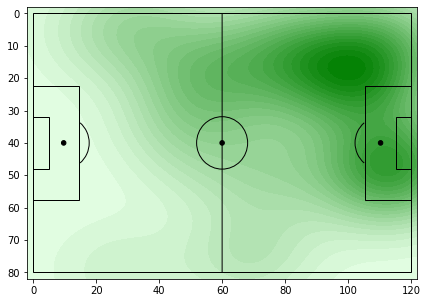

In [276]:
heatmap(Ronaldo_pos) #show heatmap of Ronaldo

**For y axis, I think it should be reversed to make the origin point (0,0) in the left corner of the attaking team as shown in dataset description of events coordinates**

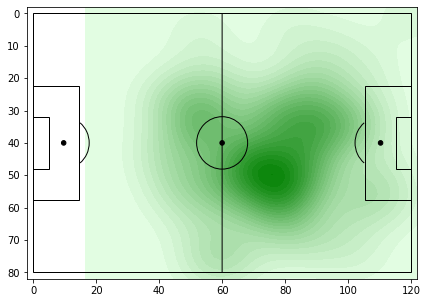

In [274]:
heatmap(Messi_pos) #show heatmap of Messi

**Ronaldo was active in the left side, but messi -as usual- is active in the center**

**[CRQ2] 2. Considering only the match Juventus - Napoli played on the 22 April 2018:
visualize with arrows the starting point and ending point of each pass done during the match by Jorginho and Miralem Pjanic. Is there a huge difference between the map with all the passes done and the one with only accurate passes? Comment the results and point out the main differences.**

In [9]:
matches_Italy = pd.read_json('/Users/MO/Desktop/AMD/AMD-HW2/Dataset/matches/matches_Italy.json')
events_Italy = pd.read_json('/Users/MO/Desktop/AMD/AMD-HW2/Dataset/events/events_Italy.json')
teams = pd.read_json('/Users/MO/Desktop/AMD/AMD-HW2/Dataset/teams.json')

In [34]:
match_events = events_Italy.where(events_Italy.matchId == 2576295).dropna()
Jorginho_passes = match_events.query("playerId == 21315 and eventId == 8")
Pjanic_passes = match_events.query("playerId == 20443 and eventId == 8")

In [280]:
def passes_arrows(pos, arr_color, kde_color='green'):
    #This func is to plot the passes arrows
    #INPUT: positions, arrows color, kde color initialized as green
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    kde_plot(pos , kde_color) #calling kde plot

    for i in pos:
        ax.annotate("", xy = (i[1].get('x')*1.2, i[1].get('y')*.8), xycoords = 'data',
                   xytext = (i[0].get('x')*1.2, i[0].get('y')*.8), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = arr_color),)
    draw_pitch(ax) #overlay our different objects on the pitch

    plt.ylim(82, -2)
    plt.xlim(-2, 122)
    #plt.axis('off')
    plt.show()


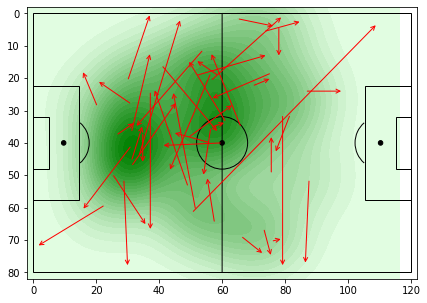

In [281]:
passes_arrows(Pjanic_passes.positions, 'red') #visualize Pjanic passes

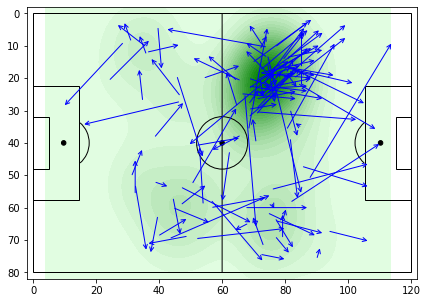

In [282]:
passes_arrows(Jorginho_passes.positions,'blue') #visualize Jorginho passes

In [283]:
#HERE we just filter the data to get only the accurate passes
idxP=[]
for i in Pjanic_passes.index:
    [idxP.append(i) for j in Pjanic_passes.loc[i].tags if j.get('id')==1801]
    
Pjanic_acc_passes= Pjanic_passes.loc[idxP]
idxJ=[]
for i in Jorginho_passes.index:
    [idxJ.append(i) for j in Jorginho_passes.loc[i].tags if j.get('id')==1801]
    
Jorginho_acc_passes= Jorginho_passes.loc[idxJ]

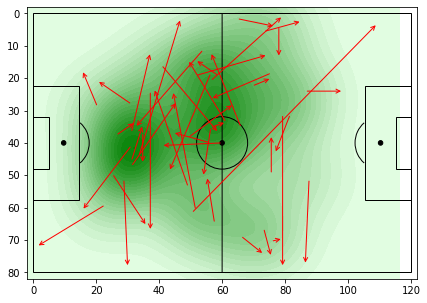

In [272]:
passes_arrows(Pjanic_acc_passes.positions, 'red') #visualize Pjanic accurate passes

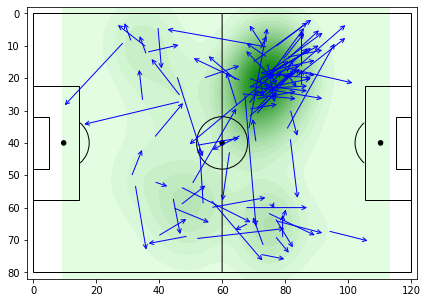

In [273]:
passes_arrows(Jorginho_acc_passes.positions,'blue') #visualize Jorginho accurate passes

In [287]:
print("Pjanic's all passes = ",Pjanic_passes.shape[0])
print("Pjanic's accurate passes = ",Pjanic_acc_passes.shape[0])
print("Jorginho's all passes = ",Jorginho_passes.shape[0])
print("Jorginho's accurate passes = ",Jorginho_acc_passes.shape[0])

Pjanic's all passes =  44
Pjanic's accurate passes =  43
Jorginho's all passes =  114
Jorginho's accurate passes =  98


**Notice that Jorginho is more active than Pjanic, at the same  the accuracy of Pjanic passes is 97.7% but Jorginho's accuracy is less: 85.9%**